In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.8 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import numpy as np
import random
import time

In [3]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [4]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [6]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [7]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [8]:
q_table

array([[0.5175166 , 0.4750587 , 0.47947784, 0.47548241],
       [0.35685128, 0.28655684, 0.31295019, 0.45835564],
       [0.41555922, 0.41110446, 0.39443528, 0.43089622],
       [0.3759335 , 0.28060964, 0.36199554, 0.41765555],
       [0.53998466, 0.40367173, 0.37919417, 0.34798134],
       [0.        , 0.        , 0.        , 0.        ],
       [0.19803336, 0.19465706, 0.26135245, 0.13835241],
       [0.        , 0.        , 0.        , 0.        ],
       [0.42537892, 0.48411518, 0.38820654, 0.5907486 ],
       [0.4344051 , 0.61729458, 0.52130023, 0.32361139],
       [0.55688881, 0.45300487, 0.40090327, 0.31999246],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.5123534 , 0.63157596, 0.76753535, 0.60516283],
       [0.71364131, 0.91441343, 0.76675802, 0.75775411],
       [0.        , 0.        , 0.        , 0.        ]])

In [9]:
sum(rewards_all)

13048.0

In [10]:
sum(rewards_all[0:1000])

267.0

In [11]:
sum(rewards_all[1000:2000])

587.0

In [12]:
sum(rewards_all[2000:3000])

575.0

In [13]:
sum(rewards_all[9000:10000])

684.0

In [14]:
sum(rewards_all[19000:20000])

684.0

In [15]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [16]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [17]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [18]:
play_multiple_times(env, q_table, 1000)

Number of successes: 729/1000
Average number of steps: 37.65294924554184


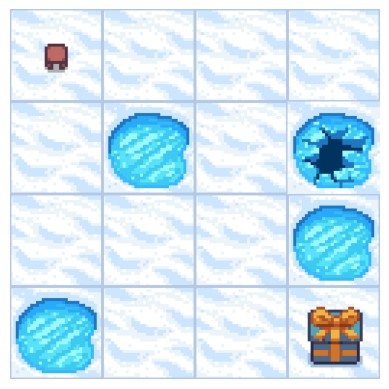

(0.0, 10)

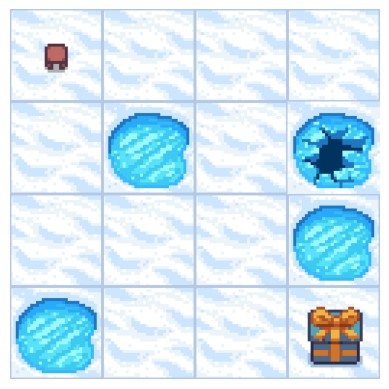

In [19]:
play(env, q_table, render=True)

In [20]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [21]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

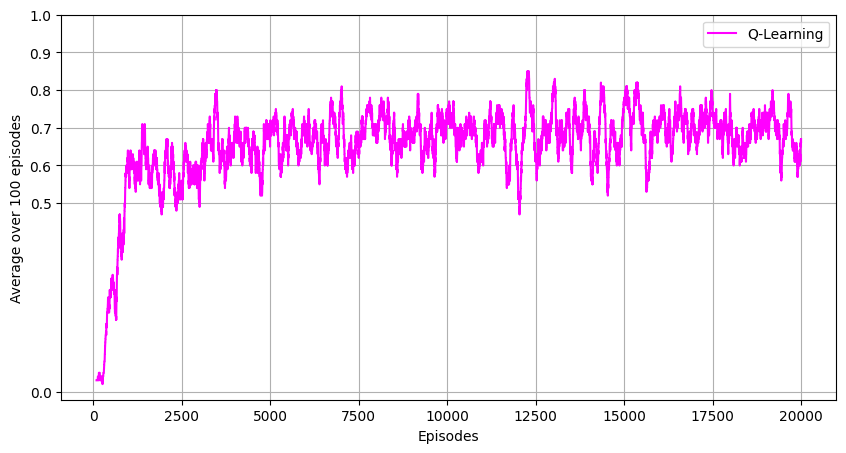

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

In [23]:
def get_action(state, env, q_table, epsilon):
  if np.random.uniform(0,1) < epsilon:
    return np.random.randint(env.action_space.n)
  else:
    return np.argmax(q_table[state, :])

In [24]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, epsilon_start, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    rewards_all = []

    for episode in range(num_episodes):
        if epsilon_decay_rate == 0.0:
            epsilon = epsilon_start
        else:
            epsilon = min_epsilon + (epsilon_start - min_epsilon)*np.exp(-epsilon_decay_rate*episode)

        state, _ = env.reset()
        action = get_action(state, env, q_table, epsilon)
        done = False
        total_reward = 0

        for step in range(num_steps_per_episode):
            next_state, reward, terminated, info,_ = env.step(action)

            next_action = get_action(next_state, env, q_table, epsilon)

            if done:
                q_table[state][action] += learning_rate * (reward  - q_table[state][action])
            else:
                q_table[state][action] += learning_rate * ( reward + (gamma * q_table[next_state][next_action]) - q_table[state][action])

            total_reward += reward

            state = next_state
            action = next_action
            if info or terminated:
              done = True
            if done:
              break

        rewards_all.append(total_reward)

    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [293]:
q_times = []
s_times = []

# FrozenLake-v1

In [294]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [295]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length
begin = time.time()
q_table_1, rewards_all_1 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end = time.time()
q_times.append(end - begin)
print("Time: ", end - begin)

Episode 19999 finished
Time:  24.17516016960144


In [296]:
play_multiple_times(env, q_table_1, 1000)

Number of successes: 735/1000
Average number of steps: 36.57823129251701


In [297]:
np.mean(rewards_all_1)

0.6484

In [309]:
# Hyperparameters
gamma = 0.9
learning_rate = 0.06
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_start = 0.2
epsilon_decay_rate = 0.00015

num_episodes = 20000
num_steps_per_episode = 1000
begin = time.time()
q_table_2, rewards_all_2 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, epsilon_start, min_epsilon, epsilon_decay_rate)
end = time.time()
s_times.append(end - begin)
print("Time: ", end - begin)

Episode 19999 finished
Time:  14.23427963256836


In [310]:
play_multiple_times(env, q_table_2, 1000)

Number of successes: 623/1000
Average number of steps: 36.24077046548957


In [311]:
np.mean(rewards_all_2)

0.33645

In [312]:
window = 100
average_y1 = []
average_y2 = []
for ind in range(len(rewards_all_1) - window + 1):
    average_y1.append(np.mean(rewards_all_1[ind:ind+window]))
for ind in range(window - 1):
    average_y1.insert(0, np.nan)
for ind in range(len(rewards_all_2) - window + 1):
    average_y2.append(np.mean(rewards_all_2[ind:ind+window]))
for ind in range(window - 1):
    average_y2.insert(0, np.nan)

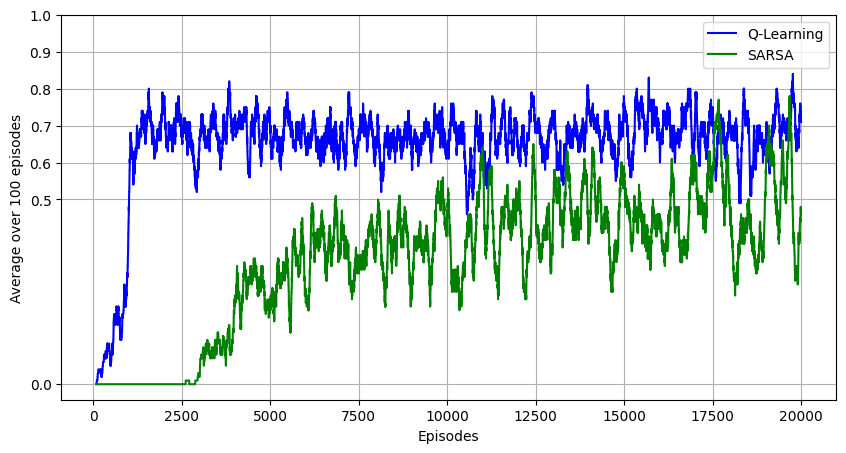

In [313]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_1)), average_y1, color='blue', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_2)), average_y2, color='green', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# FrozenLake8x8-v1

In [314]:
env = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")

In [318]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.01
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.00015

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length
begin = time.time()
q_table_1, rewards_all_1 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end = time.time()
q_times.append(end - begin)
print("Time: ", end - begin)

Episode 19999 finished
Time:  25.272573709487915


In [319]:
play_multiple_times(env, q_table_1, 1000)

Number of successes: 209/1000
Average number of steps: 73.92344497607655


In [320]:
np.mean(rewards_all_1)

0.0449

In [321]:
# Hyperparameters
gamma = 0.5
learning_rate = 0.01
max_epsilon = 1.0
min_epsilon = 0.6
epsilon_start = 0.15
epsilon_decay_rate = 0.0005

num_episodes = 20000
num_steps_per_episode = 1000
begin = time.time()
q_table_2, rewards_all_2 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, epsilon_start, min_epsilon, epsilon_decay_rate)
end = time.time()
s_times.append(end - begin)
print("Time: ", end - begin)

Episode 19999 finished
Time:  31.551127195358276


In [322]:
play_multiple_times(env, q_table_2, 1000)

Number of successes: 34/1000
Average number of steps: 49.76470588235294


In [323]:
np.mean(rewards_all_2)

0.00075

In [324]:
window = 100
average_y1 = []
average_y2 = []
for ind in range(len(rewards_all_1) - window + 1):
    average_y1.append(np.mean(rewards_all_1[ind:ind+window]))
for ind in range(window - 1):
    average_y1.insert(0, np.nan)
for ind in range(len(rewards_all_2) - window + 1):
    average_y2.append(np.mean(rewards_all_2[ind:ind+window]))
for ind in range(window - 1):
    average_y2.insert(0, np.nan)

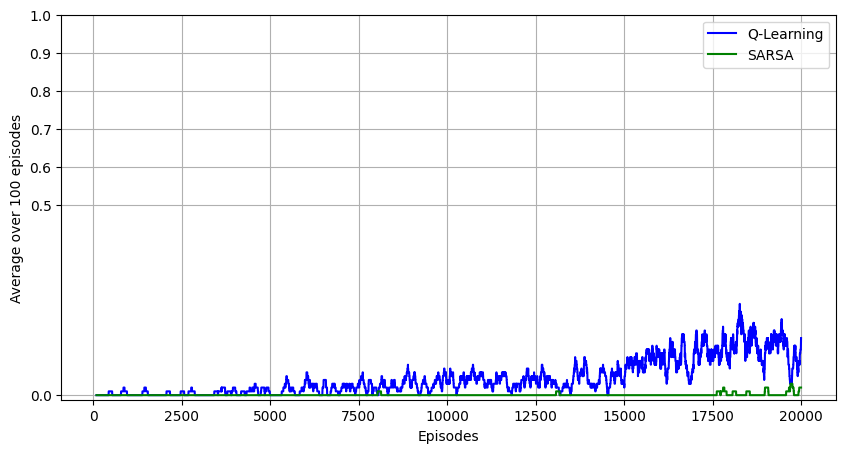

In [325]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_1)), average_y1, color='blue', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_2)), average_y2, color='green', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# Taxi-v3

In [326]:
env = gym.make('Taxi-v3', render_mode="rgb_array")

In [327]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.0005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length
begin = time.time()
q_table_1, rewards_all_1 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end = time.time()
q_times.append(end - begin)
print("Time: ", end - begin)

Episode 19999 finished
Time:  18.827739477157593


In [328]:
play_multiple_times(env, q_table_1, 1000)

Number of successes: 1000/1000
Average number of steps: 13.092


In [329]:
np.mean(rewards_all_1)

-15.897

In [330]:
# Hyperparameters
gamma = 0.9
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_start = 0.17
epsilon_decay_rate = 0.0005

num_episodes = 20000
num_steps_per_episode = 100
begin = time.time()
q_table_2, rewards_all_2 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, epsilon_start, min_epsilon, epsilon_decay_rate)
end = time.time()
s_times.append(end - begin)
print("Time: ", end - begin)

Episode 19999 finished
Time:  14.177587032318115


In [331]:
play_multiple_times(env, q_table_2, 1000)

Number of successes: 1000/1000
Average number of steps: 12.99


In [332]:
np.mean(rewards_all_2)

-0.5991

In [333]:
window = 100
average_y1 = []
average_y2 = []
for ind in range(len(rewards_all_1) - window + 1):
    average_y1.append(np.mean(rewards_all_1[ind:ind+window]))
for ind in range(window - 1):
    average_y1.insert(0, np.nan)
for ind in range(len(rewards_all_2) - window + 1):
    average_y2.append(np.mean(rewards_all_2[ind:ind+window]))
for ind in range(window - 1):
    average_y2.insert(0, np.nan)

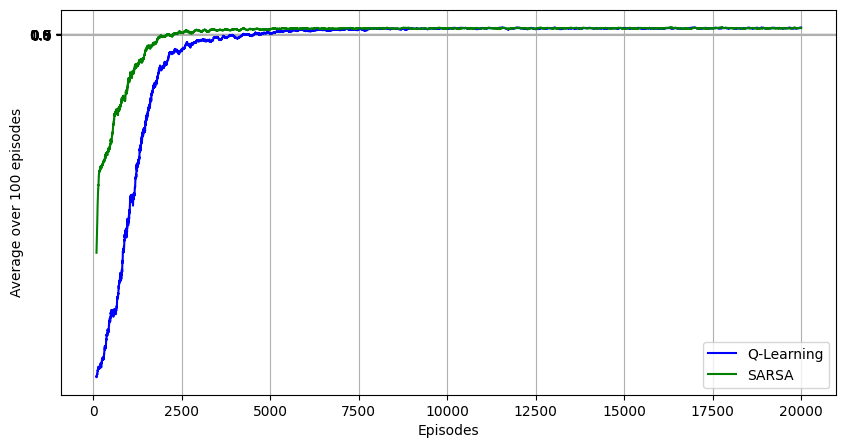

In [334]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_1)), average_y1, color='blue', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_2)), average_y2, color='green', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# Remark

In [335]:
np.mean(q_times)

22.02542382478714

In [336]:
np.mean(s_times)

15.518539269765219

In [ ]:
# Trong cả 3 ev "FrozenLake-v1", "FrozenLake8x8-v1", và "Taxi-v3", Q-Learning cho thấy hiệu suất tốt hơn SARSA.
  # Ở ev "FrozenLake-v1", cả Q-Learning và SARSA đều có hiệu suất ổn định.
  # Ở ev "FrozenLake8x8-v1", cả Q-Learning và SARSA đều có hiệu suất thấp. Tuy nhiên, đối với SARSA, mặc dù phải thực hiện tune parameters rất nhiều nhưng vẫn cho ra rewards và
    # success rate thấp hơn Q-Learning rất nhiều.
  # Ở ev "Taxi-v3", cả 2 thuật toán trên cho thấy hiệu suất bất ngờ khi đạt success rate 1000/1000.

# Hiệu suất của SARSA phụ thuộc rất nhiều vào các tham số, tuy nhiên việc tune tham số cho SARSA khó khăn hơn nhiều so với Q-Learning.

# Tóm lại, trong các ev trên, Q-Learning vẫn là sự lựa chọn tốt nhất để giải.